In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 49kB/s 
     |████████████████████████████████| 419kB 36.2MB/s 
     |████████████████████████████████| 3.0MB 59.7MB/s 


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers , Model 
from tensorflow.keras.applications import Xception ,xception 
from tensorflow.keras.preprocessing.image import img_to_array , load_img ,ImageDataGenerator
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
Base_Model = Xception(weights='imagenet',include_top = False)

In [0]:
def Prediction(Image_Path,Base_Model):
  try:
    Sample_test_Image = load_img(Image_Path, grayscale= False , color_mode= 'rgb' , target_size=(299,299))
    plt.imshow(Sample_test_Image)
    Convert_to_Array = img_to_array(Sample_test_Image)
    Expand_image_dimensions = np.expand_dims(Convert_to_Array, axis = 0)
    Preprocess_for_Model_dim = xception.preprocess_input(Expand_image_dimensions)
    Prediction = Base_Model.predict(Preprocess_for_Model_dim)
    return Prediction
  except Exception as e:
    print(e)  

In [0]:
# Define Dense Layers(ANN) for transfer Learing process
X = Base_Model.output
X = layers.GlobalAveragePooling2D()(X)

In [0]:
X = layers.Dense(units='1024' , activation='relu')(X)
X = layers.Dense(units='1024' , activation='relu')(X)
X = layers.Dense(units='200' , activation='relu')(X)
pred =layers.Dense(units='2' , activation='softmax')(X)

In [0]:
Base_Model = Model(inputs=Base_Model.input , outputs = pred)

In [129]:
Base_Model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [130]:
for i , layers in enumerate(Base_Model.layers):
  print(i,layers.name)

0 input_4
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_12
13 block2_pool
14 batch_normalization_v1_12
15 add_36
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_13
23 block3_pool
24 batch_normalization_v1_13
25 add_37
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_14
33 block4_pool
34 batch_normalization_v1_14
35 add_38
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_39
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_

In [0]:
# Time to Freeze CNN layer for training
for layers in Base_Model.layers[:133]:
  layers.trainable = False


In [132]:
# Define Trainable Layers
for layers in Base_Model.layers[133:]:
  print(layers.name)
  layers.trainable = True

dense_14
dense_15
dense_16
dense_17


In [133]:
train_data = ImageDataGenerator(xception.preprocess_input)
train_generator = train_data.flow_from_directory('/content/drive/My Drive/Colab Notebooks/training/', 
                                                   target_size = (299, 299),
                                                   color_mode = 'rgb',
                                                   batch_size = 52,
                                                   class_mode = 'categorical',
                                                   shuffle = True)

Found 1840 images belonging to 2 classes.


In [0]:
Base_Model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [135]:
History = Base_Model.fit_generator(generator = train_generator, steps_per_epoch=train_generator.n//train_generator.batch_size, epochs = 10)

Epoch 1/10
35/35 [==============================] - 12s 346ms/step - loss: 0.4274 - accuracy: 0.8082
Epoch 2/10
35/35 [==============================] - 11s 314ms/step - loss: 0.2515 - accuracy: 0.9010
Epoch 3/10
35/35 [==============================] - 11s 311ms/step - loss: 0.2261 - accuracy: 0.9122
Epoch 4/10
35/35 [==============================] - 11s 316ms/step - loss: 0.2295 - accuracy: 0.9038
Epoch 5/10
35/35 [==============================] - 11s 311ms/step - loss: 0.1928 - accuracy: 0.9245
Epoch 6/10
35/35 [==============================] - 11s 310ms/step - loss: 0.1443 - accuracy: 0.9424
Epoch 7/10
35/35 [==============================] - 11s 315ms/step - loss: 0.1626 - accuracy: 0.9301
Epoch 8/10
35/35 [==============================] - 11s 310ms/step - loss: 0.1619 - accuracy: 0.9351
Epoch 9/10
35/35 [==============================] - 11s 302ms/step - loss: 0.1067 - accuracy: 0.9575
Epoch 10/10
35/35 [==============================] - 11s 318ms/step - loss: 0.0810 - accura

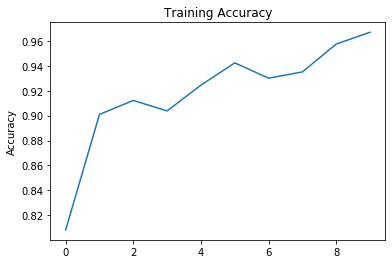

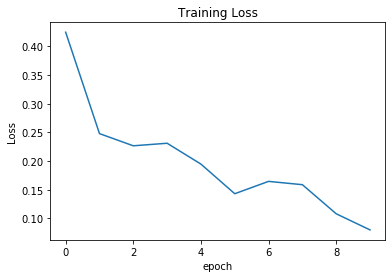

In [136]:
acc = History.history['accuracy']
loss = History.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

Below image is predict as not Damage


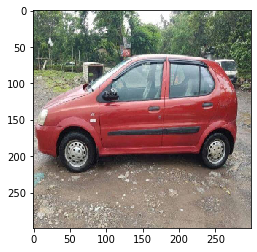

In [145]:
A=Prediction('/content/drive/My Drive/Colab Notebooks/indica.jpeg',Base_Model)
if A[0][0]>A[0][1]:
  print('Below image is predict as Damage')
else:
    print('Below image is predict as not Damage')

In [112]:
A

array([[0.01742841, 0.9825716 ]], dtype=float32)